using the refernece https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.89.023005, the differential equation for the number of atoms trapped in the mot is

$$ \frac{dN}{dt} = R - \gamma N - \beta N (N-1) $$

where $\gamma$ is the one-atom collision rate (due to the collisions with the atoms in the cloud),
$\beta$ is the two-atom collision rate (due to the collision of two trapped ions) and $R$ is the loading rate. 

for $N \gg 1$: the ladder differential equation is valid

else one can run a monte carlo simulation with the following rules:

- $N$ is the number of atoms in the trap
- $R$ is the flux of atoms that fill the trap
- $\gamma N$ is the flux of atoms that leave the trap due to the one-atom collisions
- $\beta N(N-1)$ is the flux of atoms that leave the trap due to the two-atom collisions

so, in other words, one can define a markov process:

$$ N_k = N_{k-1} + X - Y(N_{k-1}) - Z(N_{k-1}) $$

where

- $X \sim \text{poisson}(R)$
- $Y \sim \text{binom}(N_{k-1}, \gamma)$
- $Z \sim \text{binom}(N_{k-1}, \beta(N_{k-1}-1))$


In [73]:
import numpy as np
import numpy.random as rnp
import matplotlib.pyplot as plt

In [74]:
class dipolar_trap:
    def __init__(self, N0, R, gamma, beta) -> None:
        self.N = [N0]
        self.R = R
        self.gamma = gamma
        self.beta = beta
        pass

    def evolve(self, steps):
        for i in range(steps):
            new_N = self.N[-1] + rnp.poisson(self.R)
            if new_N>0:
                new_N += -rnp.binomial(new_N, self.gamma)
                if new_N>1:
                    if self.beta*new_N>1:
                        new_N = 1
                    new_N += -rnp.binomial(new_N, self.beta*(new_N-1))
            self.N .append(new_N)
        return 
    
    def show(self):
        plt.plot(self.N)
        plt.show()
        return

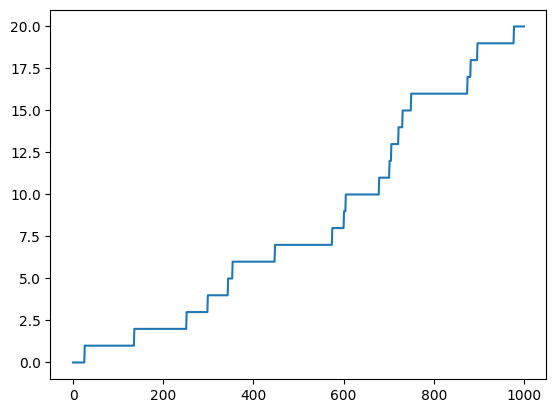

In [75]:
N0 = 0
R = 1 * 10**-2
gamma = 0#0.3 * 10**-2
beta = 0#.004 * 10**-2

dip_trap = dipolar_trap(N0, R, gamma, beta)
dip_trap.evolve(1000)
dip_trap.show()

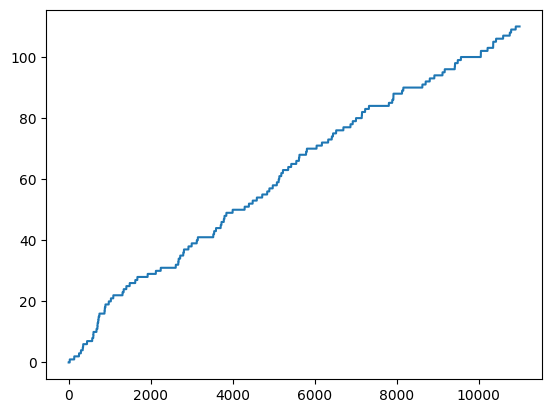

In [76]:
dip_trap.evolve(10000)
dip_trap.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_28261/2021324731.py:20: RuntimeWarning: invalid value encountered in true_divide
  Q = devs**2/means-1


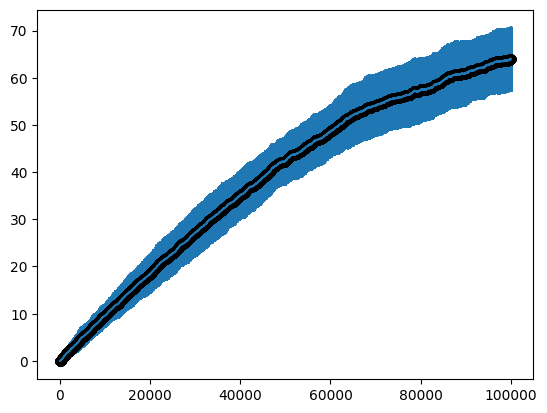

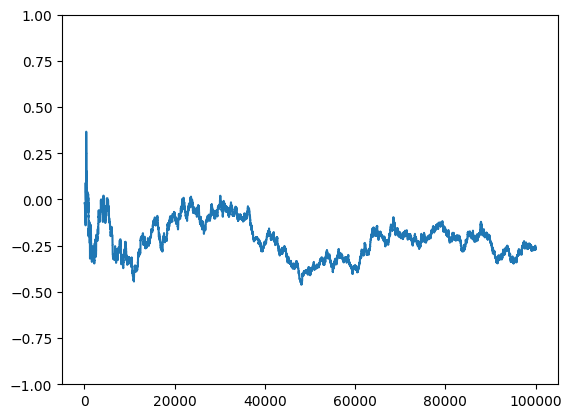

In [78]:
mag = 5

N0 = 0
R = 100 * 10**-mag
gamma = 0.2 * 10**-mag
beta = 0.014 * 10**-mag

just_reps = 50
steps = int(10**mag)
evols = np.zeros([just_reps, steps])
devs = []
for k in range(just_reps):
    dip_trap = dipolar_trap(N0, R, gamma, beta)
    dip_trap.evolve(steps-1)
    evols[k,:] = dip_trap.N
    print(k)
means = np.mean(evols, axis = 0)
devs = np.std(evols, axis = 0)

Q = devs**2/means-1

plt.errorbar(np.linspace(0,steps,steps),means,devs)
plt.plot(np.linspace(0,steps,steps),means,marker="o",color="black")

plt.show()

plt.plot(Q)
plt.ylim([-1,1])
plt.show()